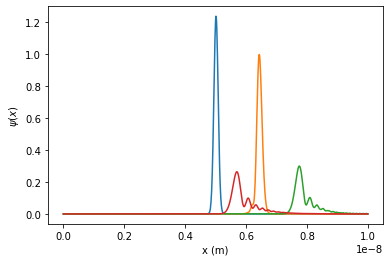

In [1]:
from scipy.linalg import solve_banded
from numpy import matmul, exp, linspace, array, zeros, empty
from pylab import plot, show, ylabel, xlabel

# Constants
m = 9.109 * 10 ** -31  # electron mass
L = 10 ** -8  # m
x0 = L / 2
sigma = 10 ** -10  # m
k = 5 * 10 ** 10  # 1/m
h_bar = 6.626 * 10 ** -34
N = 1000  # number of spatial slices
a = L / N  # spatial distance between points
h = 10 ** -18  # time step in seconds

a1 = 1 + 1j * h * h_bar / (2 * m * a ** 2)
a2 = - h * h_bar * 1j / (4 * m * a ** 2)
b1 = 1 - 1j * h * h_bar / (2 * m * a ** 2)
b2 = - a2


def psi_0(x):
    return exp(-(x - x0) ** 2 / (2 * sigma ** 2)) * exp(1j * k * x)

# initial conditions
x_points = linspace(0, L, N + 1)
psi = array(list(map(psi_0, x_points)), complex)

psi[0] = psi[N - 1] = 0

#Create the matrix A
# A = zeros([N + 1, N + 1], complex)
# A[0, 0] = a1
# A[0, 1] = a2
# A[N, N - 1] = a2
# A[N, N] = a1
# for i in range(N):
#     A[i, i - 1] = a2
#     A[i, i] = a1
#     A[i, i + 1] = a2

# # Create the matrix B
# B = zeros([N + 1, N + 1], complex)
# B[0, 0] = b1
# B[0, 1] = b2
# B[N, N - 1] = b2
# B[N, N] = b1
# for i in range(N):
#     B[i, i - 1] = b2
#     B[i, i] = b1
#     B[i, i + 1] = b2

# Create the matrix A in the form appropriate for the function solve_banded
A2 = empty([3, N + 1], complex)
A2[0, 0] = 0
A2[0, 1:] = a2
A2[1, :] = a1
A2[2, 0: N] = a2
A2[2, N] = 0

# Main loop
# store the wavefunction at each time step in a list
solution = [psi]
for i in range(500):
    psi[1: N] = b1 * psi[1: N] + b2 * (psi[2:] + psi[0: N - 1])
    psi = solve_banded((1, 1), A2, psi)
    solution.append(psi)

plot(x_points, abs(solution[0]) ** 2)
plot(x_points, abs(solution[50]) ** 2)
plot(x_points, abs(solution[250]) ** 2)
plot(x_points, abs(solution[320]) ** 2)
xlabel("x (m)")
ylabel("$\psi(x)$")
show()
#a onda foi refletida